### Описание датасета
-  Регион - субъект Российской Федерации, где находится медицинское учреждение
-  Календарный_год - год
-  Период - месяц
-  gender - пол респондента
-  poselenie - ответ на вопрос "Вы постоянно проживаете в городе или в сельской местности?"
-  Населенный_пункт - название населенного пункта, где находится медицинское учреждение
-  org_type - ответ на вопрос "В каких организациях Вы обычно получаете медицинскую помощь?"
-  last_visit - ответ на вопрос "Как давно Вы в последний раз получали медицинскую помощь?"
-  time_of_register - ответ на вопрос "Насколько Вы согласны с утверждением, что сейчас Вы можете записаться к врачу в удобное для Вас время?" (1-5 баллы по 5-бальной шкале)
-  wait_time - ответ на вопрос "Насколько Вы удовлетворены длительностью ожидания медицинской услуги с момента возникновения потребности в медицинской помощи до момента ее получения?" (1-5 баллы по 5-бальной шкале)
-  near_cab - ответ на вопрос "Насколько Вы удовлетворены длительностью ожидания непосредственно перед кабинетом?" (1-5 баллы по 5-бальной шкале)
-  comfort - ответ на вопрос "Насколько комфортным было Ваше пребывание в медицинской организации (комфортность зон ожидания, комфортное перемещение внутри медицинской организации)?" (1-5 баллы по 5-бальной шкале)
-  attitude - ответ на вопрос "Насколько Вы удовлетворены отношением к Вам со стороны медицинского персонала (врачи, мед. сестры, регистраторы, санитары)?" (1-5 баллы по 5-бальной шкале)
-  explain - ответ на вопрос "Удовлетворены ли Вы тем, как врач объяснял Вам, зачем назначено то или иное лечение, лекарственный препарат, диагностическая процедура?" (1-5 баллы по 5-бальной шкале)
-  expect - ответ на вопрос "Насколько результат Вашего обращения в медицинскую организацию соответствовал Вашим ожиданиям?" (1-5 баллы по 5-бальной шкале)
-  loyalty - ответ на вопрос "Вы бы посоветовали близким друзьям или родственникам обращаться за медицинской помощью в Вашу медицинскую организацию?" (1-5 баллы по 5-бальной шкале)
-  gen_sat - ответ на вопрос "Оцените, насколько в целом Вы удовлетворены медицинской помощью?" (1-5 баллы по 5-бальной шкале)
-  open_question_1 - ответ на вопрос "Что Вы можете назвать наибольшей проблемой в процессе получения медицинской помощи в медицинской организации, в которой Вы получаете медицинскую помощь?"
-  open_question_2 - ответ на вопрос "Что Вы можете назвать наибольшей проблемой в процессе получения медицинской помощи в регионе, в котором Вы проживаете?"
-  date_of_survey - дата опроса
-  respondent_number - номер респондента
-  doctor_domestic_visit_problem - ответ на вопрос "Возникали ли у Вас сложности при вызове врача на дом?"
-  diag_services_available - ответ на вопрос "Можете ли Вы получить при оказании первичной медико-санитарной помощи в Вашей медицинской организации диагностические и лабораторные услуги?"
-  disabled_facilitites_available - ответ на вопрос "Есть ли в Вашей медицинской организации приспособления для лиц с ограниченными возможностями?
-  problem_solved - ответ на вопрос "Была ли решена Ваша медицинская проблема?"
- region_medical_care - ответ на вопрос "Оцените, насколько Вы удовлетворены доступностью медицинской помощи в Вашем регионе?"
# TODO дополнить список

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn
import os
from scipy.special import softmax
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [3]:
from tqdm import tqdm
tqdm.pandas()

In [4]:
df = pd.read_csv('Anketa.csv', on_bad_lines='warn', sep=';')
df.shape

C:\Users\a.golub\AppData\Local\Temp\ipykernel_3952\3837633047.py:1: DtypeWarning: Columns (28,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anketa.csv', on_bad_lines='warn', sep=';')


(1301055, 36)

In [5]:
df.head()


,Id,Регион,Календарный_год,Период,gender,poselenie,Населенный_пункт,org_type,last_visit,zapis,ozhid,near_cab,comfort,attitude,explain,expect,loyalty,gen_sat,open_question_1,open_question_2,Дата_проведения_опроса_в_формате_дд_мм_гггг,Номер_респондента,17,18,19,16,Возраст,problem_solved,Удовлетворенность_доступностью_лекарств,health_selfestimation,children_number,1st_child_health,2nd_child_health,3d_child_health,4th_child_health,5th_child_health
0,1311,Ленинградская область,2022,Август,Мужской,Село,"Ленинградская обл., Всеволожский р-н., г. Сертолово",Только в государственных,менее 1 мес. назад\t,5,4,4,4,3,4,4,3,4,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,1.000,Не пользовался данной услугой,Затрудняюсь ответить,Затрудняюсь ответить,4,19.000,Затрудняюсь ответить,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1312,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Всеволожский р-н., г. Всеволожск",Только в частных,более 12 мес. назад,Затрудняюсь ответить,5,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить,Затрудняюсь ответить,5,Затрудняюсь ответить,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,2.000,Нет,Затрудняюсь ответить,Да,5,22.000,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1313,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Гатчинский р-н., г. Гатчина",Только в государственных,менее 1 мес. назад\t,3,2,5,5,5,Затрудняюсь ответить,5,4,4,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,3.000,Нет,Затрудняюсь ответить,Да,5,28.000,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1314,Ленинградская область,2022,Август,Мужской,Село,"Ленинградская обл., Волосовский р-н., Торосово д.",Только в государственных,более 12 мес. назад,5,4,5,5,5,5,Затрудняюсь ответить,5,5,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,4.000,Да,Да,Да,Затрудняюсь ответить,30.000,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1315,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Выборгский р-н., г. Выборг",Только в государственных,менее 1 мес. назад\t,Затрудняюсь ответить,5,5,5,Затрудняюсь ответить,Затрудняюсь ответить,Затрудняюсь ответить,5,Затрудняюсь ответить,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,5.000,Нет,Затрудняюсь ответить,Да,Затрудняюсь ответить,34.000,Да,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Create a dictionary for column renaming
column_mapping = {
    'Календарный_год': 'year',
    'Регион': 'Region',
    'Период': 'period',
    'poselenie': 'locality_type',
    'Населенный_пункт': 'locality',
    'zapis': 'time_of_register',
    'ozhid': 'wait_time',
    'Дата_проведения_опроса_в_формате_дд_мм_гггг': 'date_of_survey',
    'Номер_респондента': 'respondent_number',
    '16': 'region_medical_care_availability',
    '17': 'doctor_domestic_visit_problem',
    '18': 'diag_services_available',
    '19': 'disabled_facilitites_available',
    'Возраст': 'Age'
}

# Rename columns
df = df.rename(columns=column_mapping)

# Remove specified columns
columns_to_remove = ['Id', 'Удовлетворенность_доступностью_лекарств', 'health_selfestimation', 'children_number', '1st_child_health', '2nd_child_health', '3d_child_health', '4th_child_health', '5th_child_health']
df = df.drop(columns=columns_to_remove, errors='ignore')
df.head()

,Region,year,period,gender,locality_type,locality,org_type,last_visit,time_of_register,wait_time,near_cab,comfort,attitude,explain,expect,loyalty,gen_sat,open_question_1,open_question_2,date_of_survey,respondent_number,doctor_domestic_visit_problem,diag_services_available,disabled_facilitites_available,region_medical_care_availability,Age,problem_solved
0,Ленинградская область,2022,Август,Мужской,Село,"Ленинградская обл., Всеволожский р-н., г. Сертолово",Только в государственных,менее 1 мес. назад\t,5,4,4,4,3,4,4,3,4,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,1.000,Не пользовался данной услугой,Затрудняюсь ответить,Затрудняюсь ответить,4,19.000,Затрудняюсь ответить
1,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Всеволожский р-н., г. Всеволожск",Только в частных,более 12 мес. назад,Затрудняюсь ответить,5,Затрудняюсь ответить,5,Затрудняюсь ответить,Затрудняюсь ответить,Затрудняюсь ответить,5,Затрудняюсь ответить,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,2.000,Нет,Затрудняюсь ответить,Да,5,22.000,Да
2,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Гатчинский р-н., г. Гатчина",Только в государственных,менее 1 мес. назад\t,3,2,5,5,5,Затрудняюсь ответить,5,4,4,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,3.000,Нет,Затрудняюсь ответить,Да,5,28.000,Да
3,Ленинградская область,2022,Август,Мужской,Село,"Ленинградская обл., Волосовский р-н., Торосово д.",Только в государственных,более 12 мес. назад,5,4,5,5,5,5,Затрудняюсь ответить,5,5,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,4.000,Да,Да,Да,Затрудняюсь ответить,30.000,Да
4,Ленинградская область,2022,Август,Мужской,Город,"Ленинградская обл., Выборгский р-н., г. Выборг",Только в государственных,менее 1 мес. назад\t,Затрудняюсь ответить,5,5,5,Затрудняюсь ответить,Затрудняюсь ответить,Затрудняюсь ответить,5,Затрудняюсь ответить,нет замечаний,нет замечаний,2022-08-15 00:00:00.000,5.000,Нет,Затрудняюсь ответить,Да,Затрудняюсь ответить,34.000,Да


#### EDA

In [7]:
# Пропуски
display(df.isnull().sum())

Region                                   0
year                                     0
period                                   0
gender                                   2
locality_type                            1
locality                               709
org_type                             39747
last_visit                           40070
time_of_register                     39722
wait_time                            39714
near_cab                             39719
comfort                              39717
attitude                             39724
explain                              39724
expect                               39781
loyalty                              39823
gen_sat                                 20
open_question_1                     216297
open_question_2                     254197
date_of_survey                           3
respondent_number                     1563
doctor_domestic_visit_problem        83803
diag_services_available              94016
disabled_fa

In [8]:
# Целевой признак: problem_solved
df['problem_solved'] = df['problem_solved'].replace(['Да', 'Нет', 'Затрудняюсь ответить'], [1, 0, 2])

C:\Users\a.golub\AppData\Local\Temp\ipykernel_3952\3034777525.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['problem_solved'] = df['problem_solved'].replace(['Да', 'Нет', 'Затрудняюсь ответить'], [1, 0, 2])


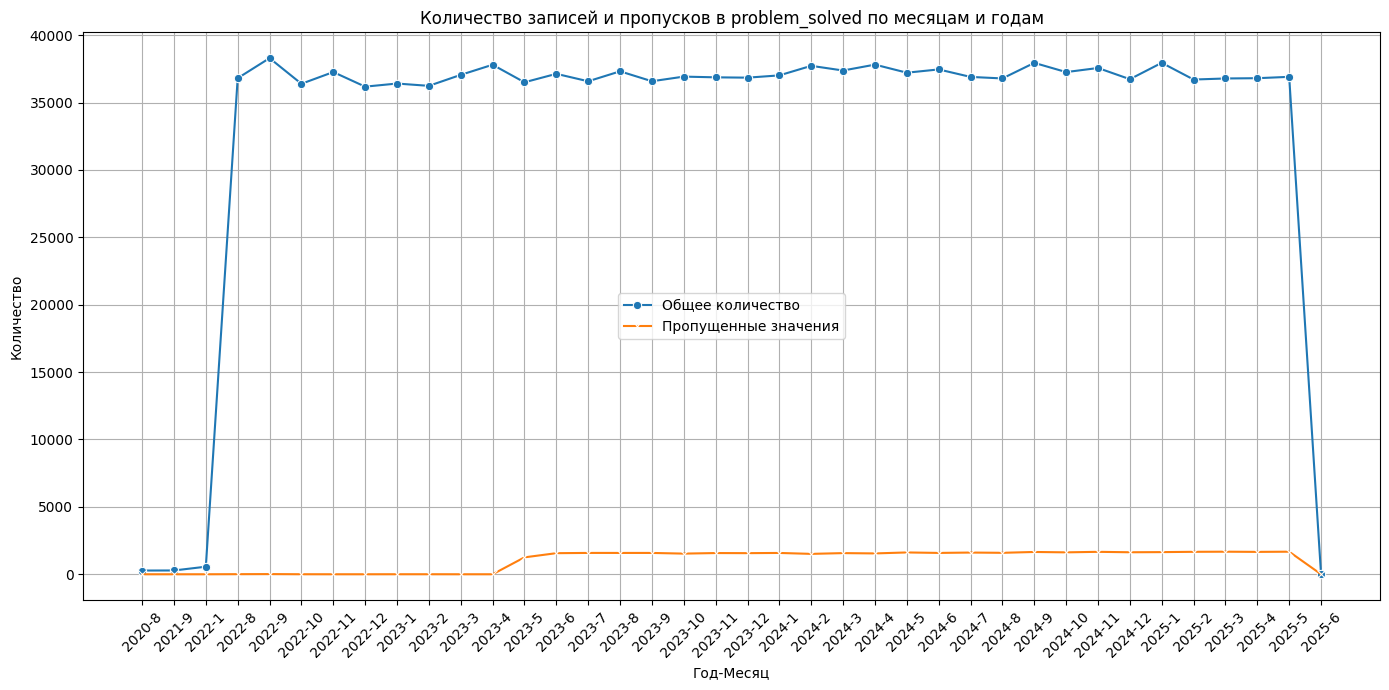

In [9]:
# Посмотрим пропуски в target
period_mapping = {
    'Январь': 1,
    'Февраль': 2,
    'Март': 3,
    'Апрель': 4,
    'Май': 5,
    'Июнь': 6,
    'Июль': 7,
    'Август': 8,
    'Сентябрь': 9,
    'Октябрь': 10,
    'Ноябрь': 11,
    'Декабрь': 12
}

# Применяем маппинг к столбцу 'period'
df['period'] = df['period'].map(period_mapping)

# Группируем данные
grouped_total = df.groupby(['year', 'period'])['problem_solved'].count().rename('total_count')
grouped_missing = df.groupby(['year', 'period'])['problem_solved'].apply(lambda x: x.isnull().sum()).rename('missing_count')

result = pd.concat([grouped_total, grouped_missing], axis=1).reset_index()

result['Year_Month'] = result['year'].astype(str) + '-' + result['period'].astype(str)

# Строим график
plt.figure(figsize=(14, 7))
sns.lineplot(data=result, x='Year_Month', y='total_count', label='Общее количество', marker='o')
sns.lineplot(data=result, x='Year_Month', y='missing_count', label='Пропущенные значения', marker='x')

plt.xticks(rotation=45)
plt.title('Количество записей и пропусков в problem_solved по месяцам и годам')
plt.xlabel('Год-Месяц')
plt.ylabel('Количество')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Удаляем ненужные колонки
# df = df.drop(columns=['respondent_number'])
# TODO посмотреть почему много пропусков
# TODO посмотреть есть ли комментарий

In [10]:
# Проверим, может дело в Регионе
# Группировка с учётом региона
grouped_total = df.groupby(['year', 'period', 'Region'])['problem_solved'].count().rename('total_count')
grouped_missing = df.groupby(['year', 'period', 'Region'])['problem_solved'].apply(lambda x: x.isnull().sum()).rename('missing_count')

# Объединение результатов
result = pd.concat([grouped_total, grouped_missing], axis=1).reset_index()
result = result.sort_values(by=['missing_count','year', 'period', 'Region'],
                            ascending=[False, True, True, True]).head(50)
display(result)


,year,period,Region,total_count,missing_count
2737,2025,3,Донецкая Народная Республика,0,648
2915,2025,5,Донецкая Народная Республика,0,646
2648,2025,2,Донецкая Народная Республика,0,643
2381,2024,11,Донецкая Народная Республика,0,642
2826,2025,4,Донецкая Народная Республика,0,638
2203,2024,9,Донецкая Народная Республика,0,635
2559,2025,1,Донецкая Народная Республика,0,618
2470,2024,12,Донецкая Народная Республика,0,614
2292,2024,10,Донецкая Народная Республика,0,603
2025,2024,7,Донецкая Народная Республика,0,592


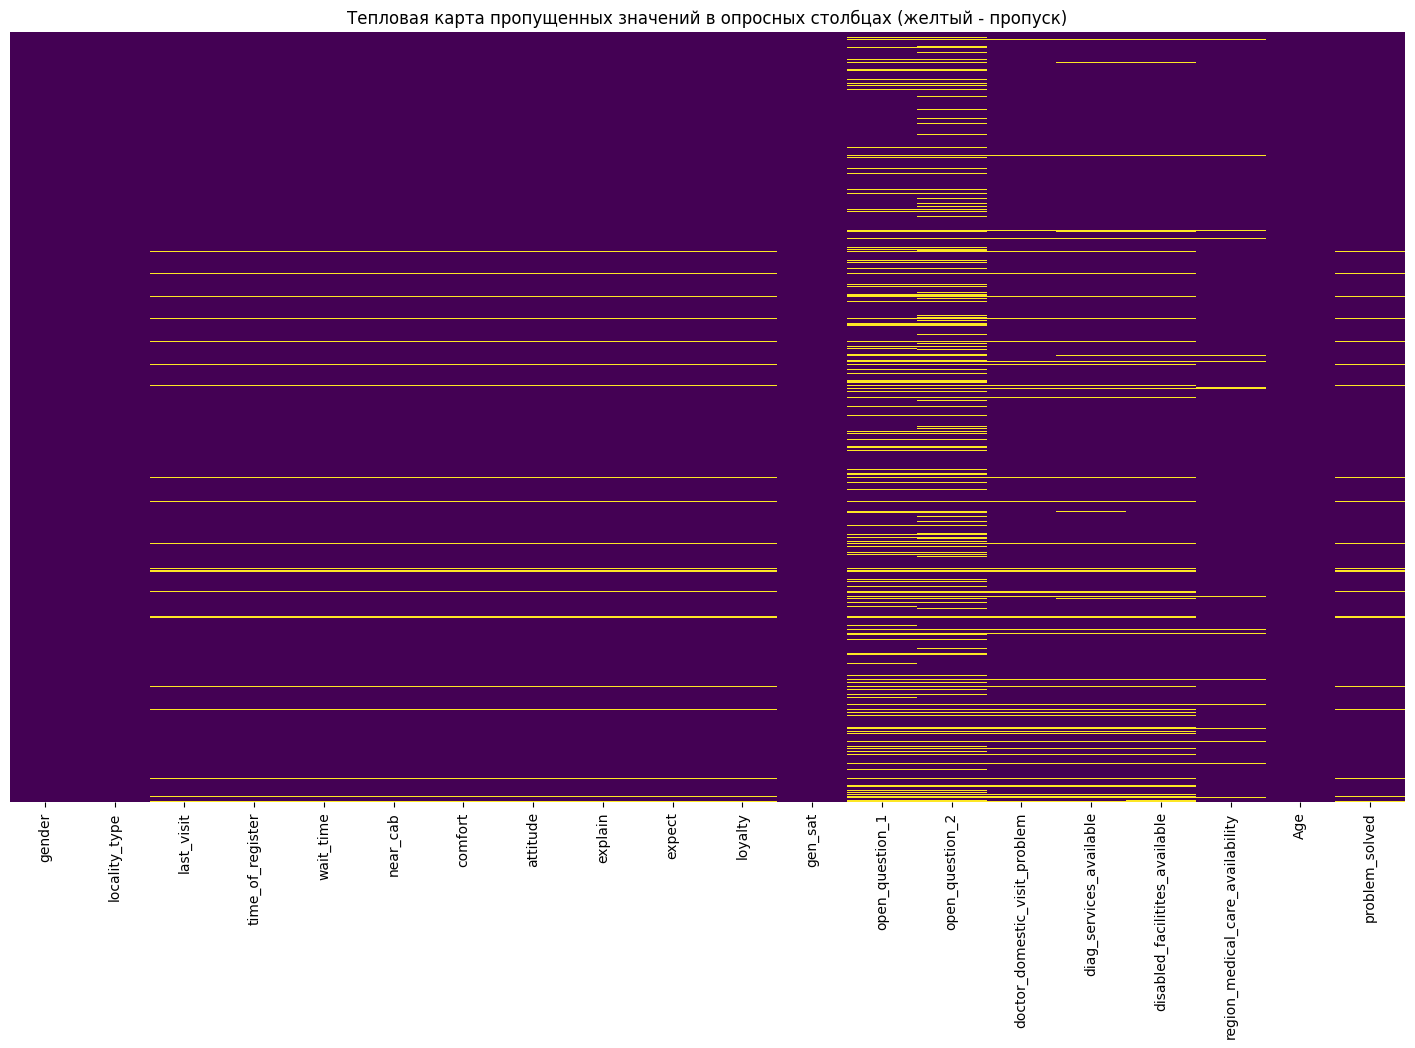

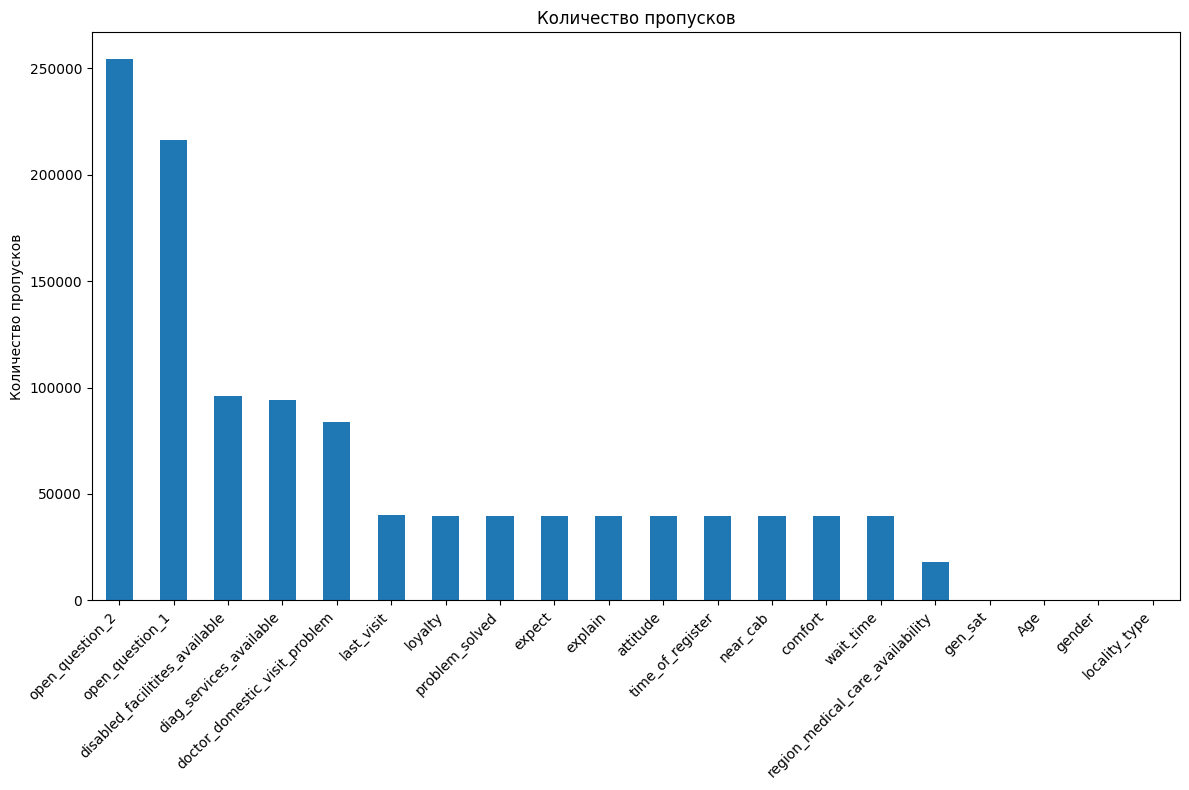

In [11]:
# Посмотрим на пропуски более детально: м.б. строки пустые целиком (т.е. мусор), 
# либо респонденты не ответили на вопросы после того, как посатвили низкую оценку по одному из вопросов (1-2)
df_analysis = df.copy()
# Столбцы, которые НЕ являются оценочными/опросными
id_cols = ['Region', 'year', 'period', 'date_of_survey', 'respondent_number', 'locality', 'org_type']
# Опросные/оценочные столбцы (все, кроме id_cols)
survey_cols = [col for col in df_analysis.columns if col not in id_cols]
# --- 2. Визуализация общего распределения пропусков ---
plt.figure(figsize=(18, 10))
sns.heatmap(df_analysis[survey_cols].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Тепловая карта пропущенных значений в опросных столбцах (желтый - пропуск)')
plt.show()

missing_counts = df_analysis[survey_cols].isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0] # Только столбцы с пропусками

plt.figure(figsize=(12, 8))
missing_counts.plot(kind='bar')
plt.title('Количество пропусков')
plt.ylabel('Количество пропусков')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Получаем топ-16 регионов по количеству пропусков
filtered_df = df[
    (df['period'] == 6) & 
    (df['year'] == 2023)
]
top_regions = filtered_df.groupby('Region')['problem_solved'].apply(lambda x: x.isna().sum()).sort_values(ascending=False).head(9).index
# Создаем фигуру с 16 subplots (4x4)
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

# heatmaps
for idx, region in enumerate(top_regions):
    region_data = df[df['Region'] == region]
    missing_matrix = region_data[survey_cols].isnull()
    sns.heatmap(missing_matrix, 
                ax=axes[idx],
                cbar=False,
                cmap='viridis',
                yticklabels=False)
    
    axes[idx].set_title(f'{region}', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# можно посмтотреть, какие признаки остутствуют вместе, что свидетельствует о полностью пустых строках
import missingno as msno
msno.heatmap(df[survey_cols])
plt.show()

In [ ]:
# Посмтотрим на соотношение ответов Затрудняюсь ответить в разных признаках
cols_for_heatmap = [
    'wait_time', 'time_of_register', 'near_cab', 'comfort', 
    'attitude', 'explain', 'loyalty', 'gen_sat', 'problem_solved'
]
# Создаем матрицу, где 1 означает "Затрудняюсь ответить", 0 - другое значение
heatmap_data = df[cols_for_heatmap].apply(lambda x: x == 'Затрудняюсь ответить').astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Blues", cbar=True)
plt.title('Тепловая карта ответов "Затрудняюсь ответить"')
plt.show()
# TODO как выкинуть Затрудняюсь ответить


In [ ]:
# Распределение целевого признака
plt.figure(figsize=(6, 4))
sns.countplot(x='problem_solved', data=df)
plt.title('Распределение целевого признака: problem_solved')
plt.show()

In [65]:
# TODO дисбаланс
# Разделим данные на классы
# SMOTE, sklearn imbalanced
# Сделать после разделения на train и test
df_positive = df[df['problem_solved'] == 1]
df_negative = df[df['problem_solved'] == 0]

min_class_size = min(len(df_positive), len(df_negative))

df_positive_sampled = df_positive.sample(n=min_class_size, random_state=42)
df_negative_sampled = df_negative.sample(n=min_class_size, random_state=42)

df_balanced = pd.concat([df_positive_sampled, df_negative_sampled])

In [ ]:
# Распределение целевого признака в сбалансированной выборке

plt.figure(figsize=(6, 4))
sns.countplot(x='problem_solved', data=df_balanced)
plt.title('Распределение целевого признака: problem_solved')
plt.show()

In [ ]:
# TODO Можно также посмотреть как меняется возраст в завсисмости от региона и даты
top_10_regions = df_balanced['Region'].value_counts().head(10).index

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Распределение респондентов по полу в топ-10 регионах (2023)', fontsize=16)

axes = axes.flatten()

for idx, month in enumerate([2, 3, 4, 5]):
    month_data = df_balanced[df_balanced['period'] == month]
    
    pivot_data = pd.pivot_table(
        month_data[month_data['Region'].isin(top_10_regions)],
        values='year',
        index='Region',
        columns='gender',
        aggfunc='count'
    )
    
    # Plot
    pivot_data.plot(kind='bar', ax=axes[idx], stacked=True)
    axes[idx].set_title(f'Месяц {month}')
    axes[idx].set_xlabel('Регион')
    axes[idx].set_ylabel('Количество респондентов')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Пол')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gender_by_region.png', bbox_inches='tight', dpi=300)
plt.show() 
# условие на расраску ячеек в таблице pivot_data

In [68]:
# TODO проверить гипотезу от разной значимости признаков для женщин и мужчин, также для разных возрастов

In [69]:
# TODO могут быть подозрительные данные, когда ту же самую анекету залили в следующем периоде

In [70]:
# TODO доделать преобразование в координаты и создание карты
# df.drop_duplicates(inplace=True)
#df_sample = df.sample(n=10).copy()

In [ ]:
'''
# Инициализация геокодера
geolocator = Nominatim(user_agent="geo_example")

# Название села
# location = geolocator.geocode("село Лопатино, Россия")

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df_sample['geo_coordinates'] = df_sample['Населенный_пункт'].progress_apply(lambda x: (None, None) if pd.isna(x) else geocode(x))


df_sample['latitude'] = df_sample['geo_coordinates'].progress_apply(lambda loc: loc.latitude if loc else None)
df_sample['longitude'] = df_sample['geo_coordinates'].progress_apply(lambda loc: loc.longitude if loc else None)


display(df_sample.head())


missing_coordinates_count = df_sample['geo_coordinates'].isnull().sum()
print(f"\nNumber of rows with missing coordinates: {missing_coordinates_count}")
'''

In [23]:
# TODO обработать текст open_question_1 и open_question_2
# TODO заджойнить с другими таблицами

In [ ]:
df = df.sample(n=200000, random_state=42)


In [ ]:
display(df)

### Feature Engineering

In [ ]:
# Перевернем таргет
df['problem_not_solved'] = 1 - df['problem_solved']
df['problem_not_solved'].dropna(inplace=True)

# Признаки удовлетворенности
satisfaction_columns = ['time_of_register', 'wait_time', 'near_cab', 'comfort',
                          'attitude', 'explain', 'expect', 'loyalty', 'gen_sat', 'region_medical_care_availability']
    

# Средняя удовлетворенность
value_map = {
    'Затрудняюсь ответить': np.nan,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5
}
df_satisfaction = df[satisfaction_columns].replace(value_map)
df[satisfaction_columns] = df[satisfaction_columns].replace(value_map)
df['avg_satisfaction'] = df[satisfaction_columns].mean(axis=1)

# Стандартное отклонение удовлетворенности
df['satisfaction_std'] = df[satisfaction_columns].std(axis=1)
    
# Количество максимальных оценок
df['max_ratings_count'] = (df[satisfaction_columns] == 5).sum(axis=1)
    
# Количество минимальных оценок
df['min_ratings_count'] = (df[satisfaction_columns] == 1).sum(axis=1)

# Преобразуем last_visit в числовые значения
visit_mapping = {
        'менее 1 мес. назад': 0.5,
        'от 1 до 3 мес. назад': 2,
        'от 3 до 4 мес. назад': 3.5,
        'от 4 до 6 мес. назад': 5,
        'от 6 до 12 мес. назад': 9,
        'более 12 мес. назад': 18
}
df['last_visit_months'] = df['last_visit'].map(visit_mapping)
df['visit_frequency'] = 1 / (df['last_visit_months'] + 0.1)
# Бинарные признаки
df['is_urban'] = df['locality'].map({'Город': 1, 'Село': 0})
df['is_male'] = (df['gender'] == 'Мужской').astype(int)
df = df.dropna(subset=['org_type'])
df['is_state_org'] = df['org_type'].str.contains('государственных').astype(int)
# Признаки доступности услуг
df['has_home_visit_problem'] = (df['doctor_domestic_visit_problem'] == 'Да').astype(int)
df['diag_available'] = (df['diag_services_available'] == 'Да').astype(int)
df['disabled_facilities'] = (df['disabled_facilitites_available'] == 'Да').astype(int)
# Общий индекс доступности
df['accessibility_index'] = (df['has_home_visit_problem'] + 
                               df['diag_available'] + 
                               df['disabled_facilities']) / 3
    
# Индекс качества обслуживания
df['service_quality_index'] = (df['time_of_register'] + 
                                 df['wait_time'] + 
                                 df['near_cab'] + 
                                 df['comfort']) / 4
    
# Индекс взаимодействия с персоналом
df['staff_interaction_index'] = (df['attitude'] + 
                                   df['explain'] + 
                                   df['expect']) / 3
# Количество респондентов в регионе
region_counts = df['Region'].value_counts()
df['region_respondent_count'] = df['Region'].map(region_counts)
    
# Средняя удовлетворенность по региону
region_satisfaction = df.groupby('Region')['avg_satisfaction'].mean()
df['region_avg_satisfaction'] = df['Region'].map(region_satisfaction)

# Средний возраст по региону
region_age = df.groupby('Region')['Age'].mean()
df['region_avg_age'] = df['Region'].map(region_age)
    
# Label Encoding (числовое кодирование)
le = LabelEncoder()
df['region_label'] = le.fit_transform(df['Region'])
# TODO изучить one code encoder, бинарный (сколько колонок потребуется чтобы закодировать 153 уникальных значения), LabelEncoder (отличие от TargetEncoder), кэшированный признак
# TODO как можно закодировать регионы (плюсы и минусы)
# TODO как можно закодировать дату (плюсы и минусы)
# TODO как можно закодировать возраст (плюсы и минусы)
# TODO как можно закодировать пол (плюсы и минусы)
# TODO как можно закодировать тип организации (плюсы и минусы)
# TODO как можно закодировать тип посещения (плюсы и минусы)

# Полиномиальные признаки
numeric_features = [
        'Age',
        'avg_satisfaction',
        'satisfaction_std',
        'last_visit_months',
        'visit_frequency',
        'service_quality_index',
        'staff_interaction_index',
        'accessibility_index',
        'region_avg_satisfaction',
        'region_avg_age'
]

# Заполняем пропуски в числовых признаках
for feature in numeric_features:
    if feature in df.columns:
        df[feature] = df[feature].fillna(df[feature].mean())

# Создаем полиномиальные признаки степени 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numeric_features])
    
# Создаем имена для полиномиальных признаков
feature_names = poly.get_feature_names_out(numeric_features)
    
# Создаем DataFrame с полиномиальными признаками
poly_df = pd.DataFrame(poly_features, columns=feature_names)
    
# Удаляем исходные признаки, так как они уже есть в основном DataFrame
poly_df = poly_df.drop(columns=numeric_features)
    
# Добавляем полиномиальные признаки к основному DataFrame
df = pd.concat([df, poly_df], axis=1)
    
# Создаем признаки взаимодействия между удовлетворенностью и демографическими характеристиками
df['satisfaction_age_interaction'] = df['avg_satisfaction'] * df['Age']
df['satisfaction_urban_interaction'] = df['avg_satisfaction'] * df['is_urban']
df['satisfaction_gender_interaction'] = df['avg_satisfaction'] * df['is_male']
    
# Взаимодействие между качеством обслуживания и доступностью
df['service_access_interaction'] = df['service_quality_index'] * df['accessibility_index']
    
# Взаимодействие между частотой посещений и удовлетворенностью
df['visit_satisfaction_interaction'] = df['visit_frequency'] * df['avg_satisfaction']


In [ ]:
display(df)

In [31]:
df = df.dropna(subset=['problem_not_solved'])

### Baseline модель

In [45]:
columns_to_drop = [
    'locality', 'locality_type', 'org_type', 'problem_solved', 'problem_not_solved', 'open_question_1', 'open_question_2',
    'doctor_domestic_visit_problem', 'diag_services_available',
    'disabled_facilitites_available', 'region_medical_care_availability', 'last_visit', 'period', 'gender', 'Region', 'date_of_survey'
]


X = df.drop(columns=columns_to_drop)
y = df['problem_not_solved']

imputer = SimpleImputer(strategy='mean')


In [ ]:
y

In [47]:


X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# mlflow.set_experiment("Medical_Survey_Analysis")
# Параметры модели
params = {
    'C': 1.0,
    'max_iter': 5000,
    'random_state': 42
}

In [ ]:
# Создаем и обучаем модель
model = LogisticRegression(**params)
model.fit(X_train, y_train)
    
# Получаем предсказания
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# Вычисляем метрики
metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro'),
    'f1': f1_score(y_test, y_pred, average='macro')#, 'roc_auc': roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')
}
    

# Выводим результаты
print("\nРезультаты обучения:")
print(f"Accuracy: {metrics['accuracy']:.3f}")
print(f"Precision: {metrics['precision']:.3f}")
print(f"Recall: {metrics['recall']:.3f}")
print(f"F1-score: {metrics['f1']:.3f}")
#print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    
# Сохраняем важные признаки
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
    
print("\nТоп-10 важных признаков:")
print(feature_importance.head(10))

In [ ]:
columns_to_drop = [
    'poselenie', 'org_type', 'problem_solved', 'open_question_1', 'open_question_2',
    'doctor_domestic_visit_problem', 'diag_services_available',
    'disabled_facilitites_available', 'last_visit', 'Период', 'gender', 'poselenie',
    'Регион'
]


X = df.drop(columns=columns_to_drop)
y = df['problem_not_solved']

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlflow.set_experiment("Medical_Survey_Analysis")
# Параметры модели
params = {
    'C': 1.0,
    'max_iter': 1000,
    'random_state': 42
}

# Обучение модели с MLflow
with mlflow.start_run():
    # Логируем параметры
    mlflow.log_params(params)
    
    # Создаем и обучаем модель
    model = LogisticRegression(**params)
    model.fit(X_train, y_train)
    
    # Получаем предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Вычисляем метрики
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    # Логируем метрики
    mlflow.log_metrics(metrics)
    
    # Логируем модель
    mlflow.sklearn.log_model(model, "logistic_regression")
    
    # Выводим результаты
    print("\nРезультаты обучения:")
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"Precision: {metrics['precision']:.3f}")
    print(f"Recall: {metrics['recall']:.3f}")
    print(f"F1-score: {metrics['f1']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    
    # Сохраняем важные признаки
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(model.coef_[0])
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    print("\nТоп-10 важных признаков:")
    print(feature_importance.head(10))
    
    # Сохраняем модель локально
    mlflow.sklearn.save_model(model, "models/logistic_regression") 

In [ ]:
# добавить подбор гиперпараметров

In [ ]:
# TODO Графики ROC-AUC, PR AUC, гистограмма скоров, precision, recall, f1-score от порога, f01, f05, f2, f5. Какая b на что обращает больше внимание (MLFLOW)

In [ ]:
# TODO написать функцию для передачи модели в mlflow

In [ ]:
# TODO обучать модель внутри контекта